## Load the Data

In [2]:
import pandas as pd

data = pd.read_csv('student_data.csv')
data.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


## Visualize the Data

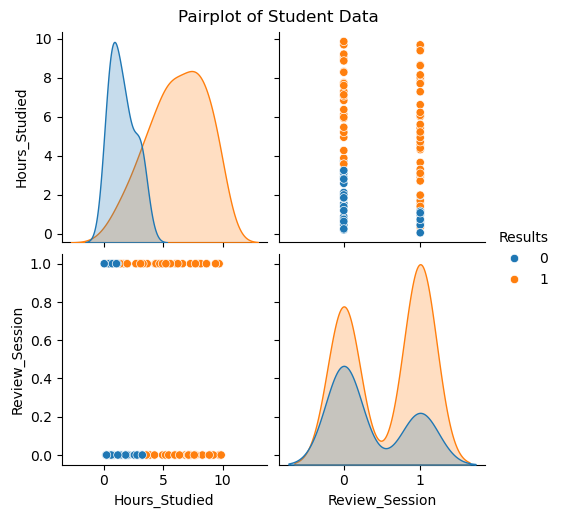

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='Results')
plt.suptitle('Pairplot of Student Data', y=1.02)
plt.show()


## Prepare Features and Target

In [6]:
X = data[['Hours_Studied', 'Review_Session']]
y = data['Results']


## Fit Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)


LogisticRegression()

##  Display Model Coefficients

In [10]:
coefficients = pd.DataFrame({
    'Feature': ['Intercept', 'Hours_Studied', 'Review_Session'],
    'Coefficient': [model.intercept_[0], model.coef_[0][0], model.coef_[0][1]]
})

print(coefficients)


          Feature  Coefficient
0       Intercept    -4.613739
1   Hours_Studied     1.365420
2  Review_Session     1.877976


## Evaluate the Model Performance

In [12]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Predictions and probabilities
y_pred = model.predict(X)
y_proba = model.predict_proba(X)[:, 1]

# Metrics
accuracy = accuracy_score(y, y_pred)
auc = roc_auc_score(y, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"AUC Score: {auc:.2f}")


Accuracy: 0.93
AUC Score: 0.98


## Plot ROC Curve

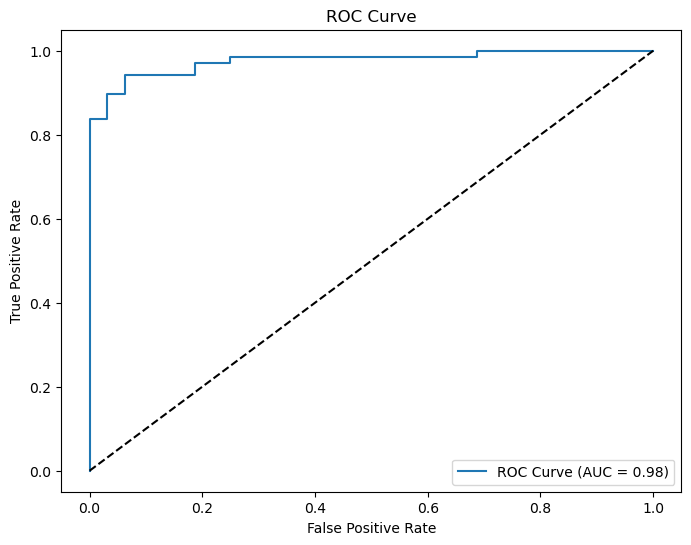

In [14]:
fpr, tpr, _ = roc_curve(y, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0,1], [0,1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
